In [1]:
import os
import sys
import importlib
print(sys.path)
%pwd

os.chdir('/home/rfpred')
sys.path.append('/home/rfpred/')
sys.path.append('/home/rfpred/envs/rfenv/lib/python3.11/site-packages/')
sys.path.append('/home/rfpred/envs/rfenv/lib/python3.11/site-packages/nsdcode')


['/home/rfpred/notebooks/clean', '/home/rfpred/envs/rfenv/lib/python311.zip', '/home/rfpred/envs/rfenv/lib/python3.11', '/home/rfpred/envs/rfenv/lib/python3.11/lib-dynload', '', '/home/rfpred/envs/rfenv/lib/python3.11/site-packages', '/home/rfpred/notebooks/alien_nbs/lgnpy', '/home/rfpred/envs/rfenv/lib/python3.11/site-packages/nsd_access-0.0.1.dev0-py3.11.egg', '/home/rfpred/envs/rfenv/lib/python3.11/site-packages/cifti-1.1-py3.11.egg']


In [2]:
import funcs.brain_mapping
importlib.reload(funcs.brain_mapping)

from funcs.brain_mapping import reg_to_nifti, vol_to_surf

from classes.regdata import RegData
from funcs.reloads import Reloader
from classes.natspatpred import NatSpatPred
from classes.voxelsieve import VoxelSieve
NSP = NatSpatPred()
NSP.initialise(verbose=True)
rl = Reloader()

Naturalistic Spatial Prediction class: Initialised

Class contains the following attributes:
 .analyse
 .attributes
 .cortex
 .datafetch
 .explore
 .hidden_methods
 .initialise
 .nsd_datapath
 .own_datapath
 .stimuli
 .subjects
 .utils


### Tryout baseline performance to .mgz

In [19]:
# Here I try to work with the outputs from the gabor pyramid baseline model

for subject in NSP.subjects:
    print(f"Working on {subject}")
    # subject = "subj01"
    reg_to_nifti(subject=subject,
            reg_type="baseline",
            # model="gabor_pyr_sf4_dir4_fullviscortex",
            model="VGG16_500pc_conv0_fullviscortex",
            assign_stat=None,
            reg_stat="delta_r",
            plot_brain=False,
            plot_lay_assign=False,
            save_nifti=True,
            verbose=True,
            custom_subfolder=None,
            mean_delta_r=True,
            )

Working on subj01
         x   y   z roi  delta_r_501 Mean Statistic
0       55   7  77  V1     0.039914       0.039914
1       55  11  75  V1     0.016635       0.016635
2       56   7  76  V1     0.044893       0.044893
3       56   7  77  V1     0.025500         0.0255
4       56   7  78  V1     0.027554       0.027554
...    ...  ..  ..  ..          ...            ...
27176  114  28  65  V4    -0.004072      -0.004072
27177  114  28  66  V4     0.004998       0.004998
27178  114  29  62  V4     0.013267       0.013267
27179  115  28  64  V4    -0.016892      -0.016892
27180  115  28  65  V4    -0.007788      -0.007788

[27181 rows x 6 columns]
Working on subj02
         x   y   z roi  delta_r_501 Mean Statistic
0       58  11  60  V1     0.018055       0.018055
1       59   6  62  V1     0.030792       0.030792
2       59   6  63  V1     0.035953       0.035953
3       59   7  61  V1     0.049129       0.049129
4       59   7  62  V1     0.031986       0.031986
...    ...  ..  ..  

In [20]:
for subject in NSP.subjects:
        vol_to_surf(subject=subject,
                # source_file_name="baseline_gabor_pyr_sf4_dir4_delta_r.nii",
                source_file_name="baseline_VGG16_500pc_conv0_fullviscortex_delta_r.nii",
                interpmethod="cubic",
                )
        # vol_to_surf(subject=subject,
        #         # source_file_name="baseline_gabor_pyr_sf4_dir4_delta_r.nii",
        #         source_file_name="baseline_VGG16_500pc_conv2_delta_r.nii",
        #         interpmethod="cubic",
        #         )
        # vol_to_surf(subject=subject,
        #         # source_file_name="baseline_gabor_pyr_sf4_dir4_delta_r.nii",
        #         source_file_name="baseline_VGG16_500pc_conv3_delta_r.nii",
        #         interpmethod="cubic",
        #         )
        
        
        
        # vol_to_surf(subject=subject,
        # source_file_name="baseline_gabor_pyr_sf4_dir4_fullviscortex_delta_r.nii",
        # interpmethod="cubic",
        # )
        
        

In [5]:


# for subject in NSP.subjects:
# print(f"Working on {subject}")  

# "/home/rfpred/data/custom_files/subj01/stat_volumes/unpredvggfull_gabor_baseline_vggfull_R_alt_model.nii"

subject = "subj01"
        
vol_to_surf(subject=subject,
        source_file_name="unpredvggfull_gabor_baseline_vggfull_R_alt_model.nii",
        interpmethod="cubic",
        )

### Full VGG16 Gabor baseline unpredictability results

Working on subj01
        x   y   z roi  delta_r_2  delta_r_3  delta_r_4  delta_r_5  delta_r_6  \
0      56   8  75  V1   0.009797   0.011440   0.009964   0.009463   0.008588   
1      56   9  74  V1   0.003703   0.004517   0.003931   0.003682   0.003207   
2      56   9  76  V1   0.007577   0.008483   0.007603   0.007161   0.007054   
3      56  10  75  V1   0.005275   0.005891   0.005103   0.004768   0.004450   
4      56  10  76  V1   0.007369   0.008063   0.007069   0.006669   0.006343   
...   ...  ..  ..  ..        ...        ...        ...        ...        ...   
2521  113  26  69  V4   0.016014   0.016111   0.015216   0.014614   0.014515   
2522  113  28  61  V4   0.000188   0.000169   0.000057   0.000024   0.000060   
2523  114  25  69  V4   0.011513   0.011950   0.010757   0.010166   0.010025   
2524  114  26  67  V4   0.014654   0.014488   0.013274   0.012603   0.013057   
2525  114  27  64  V4   0.000040   0.000105   0.000038   0.000082  -0.000035   

      delta_r_7  ... 

/home/rfpred/envs/rfenv/lib/python3.11/site-packages/nilearn/plotting/displays/_slicers.py:438: UserWarning: empty mask
  xmin_, xmax_, ymin_, ymax_, zmin_, zmax_ = get_mask_bounds(


Working on subj02
        x   y   z roi  delta_r_2  delta_r_3  delta_r_4  delta_r_5  delta_r_6  \
0      59   7  61  V1   0.005756   0.006532   0.005919   0.005692   0.005242   
1      59   8  62  V1   0.006180   0.006683   0.006165   0.006005   0.005457   
2      59  10  59  V1   0.000935   0.000755   0.000641   0.000625   0.000611   
3      59  10  60  V1  -0.001371  -0.001598  -0.001406  -0.001338  -0.001144   
4      59  12  59  V1   0.011903   0.012569   0.011736   0.011361   0.010903   
...   ...  ..  ..  ..        ...        ...        ...        ...        ...   
1563  104  35  54  V4   0.000897   0.000370   0.000606   0.000658   0.001252   
1564  105  25  55  V4   0.003795   0.003932   0.003628   0.003513   0.003619   
1565  105  26  54  V4   0.008417   0.008192   0.008692   0.008533   0.009454   
1566  105  27  53  V4   0.000641   0.000464   0.000543   0.000553   0.000753   
1567  105  28  53  V4  -0.000507  -0.000369  -0.000569  -0.000602  -0.000684   

      delta_r_7  ... 

/home/rfpred/envs/rfenv/lib/python3.11/site-packages/nilearn/plotting/displays/_slicers.py:438: UserWarning: empty mask
  xmin_, xmax_, ymin_, ymax_, zmin_, zmax_ = get_mask_bounds(


Working on subj03
        x   y   z roi  delta_r_2  delta_r_3  delta_r_4  delta_r_5  delta_r_6  \
0      58  20  40  V1   0.004752   0.005171   0.004612   0.004380   0.004185   
1      59  17  42  V1   0.013733   0.015107   0.013008   0.012231   0.011257   
2      59  20  39  V1   0.010670   0.011964   0.010619   0.009989   0.009416   
3      60  15  46  V1   0.002890   0.003388   0.001805   0.001266   0.000759   
4      60  17  41  V1   0.013282   0.014284   0.012966   0.012570   0.011512   
...   ...  ..  ..  ..        ...        ...        ...        ...        ...   
1998  114  34  49  V4  -0.000070  -0.000240  -0.000086  -0.000131   0.000156   
1999  115  31  55  V4   0.003647   0.003141   0.002911   0.002648   0.003376   
2000  115  32  50  V4  -0.000468  -0.000460  -0.000470  -0.000456  -0.000471   
2001  115  32  55  V4   0.001703   0.001407   0.001336   0.001178   0.001507   
2002  115  34  48  V4   0.000022  -0.000117  -0.000001  -0.000043   0.000149   

      delta_r_7  ... 

/home/rfpred/envs/rfenv/lib/python3.11/site-packages/nilearn/plotting/displays/_slicers.py:438: UserWarning: empty mask
  xmin_, xmax_, ymin_, ymax_, zmin_, zmax_ = get_mask_bounds(


Working on subj04
        x   y   z roi  delta_r_2  delta_r_3  delta_r_4  delta_r_5  delta_r_6  \
0      57  15  50  V1   0.001397   0.002123   0.002283   0.002284   0.001833   
1      57  17  48  V1   0.014828   0.015665   0.014881   0.014603   0.014122   
2      58  14  49  V1   0.001519   0.001733   0.001890   0.001750   0.001960   
3      58  14  50  V1  -0.001376  -0.001109  -0.000917  -0.000895  -0.001090   
4      58  15  49  V1  -0.000086   0.000179   0.000640   0.000575   0.001009   
...   ...  ..  ..  ..        ...        ...        ...        ...        ...   
1144  109  24  53  V4   0.003055   0.002329   0.002550   0.002479   0.003336   
1145  109  24  54  V4   0.004682   0.003864   0.004003   0.003873   0.004780   
1146  109  24  55  V4   0.004773   0.004093   0.004259   0.004157   0.004911   
1147  109  25  53  V4  -0.000135  -0.000337  -0.000265  -0.000283   0.000039   
1148  109  25  56  V4  -0.002073  -0.002028  -0.001718  -0.001673  -0.001498   

      delta_r_7  ... 

/home/rfpred/envs/rfenv/lib/python3.11/site-packages/nilearn/plotting/displays/_slicers.py:438: UserWarning: empty mask
  xmin_, xmax_, ymin_, ymax_, zmin_, zmax_ = get_mask_bounds(


Working on subj05
        x   y   z roi  delta_r_2  delta_r_3  delta_r_4  delta_r_5  delta_r_6  \
0      46  13  50  V1   0.011425   0.012144   0.010374   0.009914   0.009180   
1      47  12  50  V1  -0.000077  -0.000057  -0.000188  -0.000214  -0.000259   
2      47  14  52  V1   0.004888   0.005476   0.005313   0.005414   0.005052   
3      47  15  51  V1   0.007948   0.008454   0.007299   0.007148   0.006214   
4      48  11  50  V1  -0.000243  -0.000172  -0.000188  -0.000206  -0.000271   
...   ...  ..  ..  ..        ...        ...        ...        ...        ...   
1968  109  26  46  V4  -0.000023   0.000128   0.000084   0.000127  -0.000076   
1969  109  26  47  V4   0.000246   0.000153   0.000059  -0.000005   0.000074   
1970  109  27  46  V4   0.001066   0.000868   0.000933   0.000801   0.001206   
1971  109  30  44  V4  -0.000278  -0.000276  -0.000315  -0.000312  -0.000348   
1972  110  27  46  V4   0.000057  -0.000044  -0.000015  -0.000042   0.000105   

      delta_r_7  ... 

/home/rfpred/envs/rfenv/lib/python3.11/site-packages/nilearn/plotting/displays/_slicers.py:438: UserWarning: empty mask
  xmin_, xmax_, ymin_, ymax_, zmin_, zmax_ = get_mask_bounds(


Working on subj06
        x   y   z roi  delta_r_2  delta_r_3  delta_r_4  delta_r_5  delta_r_6  \
0      62  25  75  V1   0.002013   0.001781   0.001805   0.001594   0.001955   
1      62  25  76  V1   0.005998   0.005024   0.005892   0.005790   0.006675   
2      64  13  86  V1   0.001158   0.001740   0.001408   0.001453   0.001233   
3      64  16  60  V1   0.014186   0.015465   0.014214   0.013574   0.013262   
4      64  20  85  V1   0.016437   0.016945   0.016417   0.016338   0.015327   
...   ...  ..  ..  ..        ...        ...        ...        ...        ...   
2044  107  26  53  V4   0.002370   0.002315   0.002066   0.001925   0.002089   
2045  107  27  53  V4   0.002713   0.002619   0.002358   0.002266   0.002437   
2046  108  25  53  V4   0.009656   0.009757   0.008783   0.008377   0.008516   
2047  108  26  53  V4   0.006750   0.006750   0.005944   0.005687   0.005687   
2048  108  27  52  V4  -0.000726  -0.000747  -0.000846  -0.000871  -0.000849   

      delta_r_7  ... 

/home/rfpred/envs/rfenv/lib/python3.11/site-packages/nilearn/plotting/displays/_slicers.py:438: UserWarning: empty mask
  xmin_, xmax_, ymin_, ymax_, zmin_, zmax_ = get_mask_bounds(


Working on subj07
        x   y   z roi  delta_r_2  delta_r_3  delta_r_4  delta_r_5  delta_r_6  \
0      42   9  72  V1   0.001117   0.001381   0.001272   0.001219   0.001130   
1      43   9  71  V1   0.011206   0.011676   0.011152   0.010696   0.010668   
2      43  10  70  V1   0.013875   0.014735   0.013591   0.012991   0.012849   
3      43  10  71  V1   0.011625   0.012101   0.011352   0.010854   0.010806   
4      43  10  72  V1   0.010491   0.010694   0.010025   0.009546   0.009580   
...   ...  ..  ..  ..        ...        ...        ...        ...        ...   
2210  104  25  50  V4  -0.000169  -0.000104  -0.000183  -0.000176  -0.000287   
2211  104  25  51  V4  -0.000356  -0.000412  -0.000496  -0.000516  -0.000395   
2212  105  24  50  V4   0.002047   0.001756   0.001575   0.001392   0.001887   
2213  105  24  51  V4   0.004277   0.004285   0.003689   0.003367   0.003793   
2214  105  25  50  V4   0.000044  -0.000003  -0.000046  -0.000070   0.000003   

      delta_r_7  ... 

/home/rfpred/envs/rfenv/lib/python3.11/site-packages/nilearn/plotting/displays/_slicers.py:438: UserWarning: empty mask
  xmin_, xmax_, ymin_, ymax_, zmin_, zmax_ = get_mask_bounds(


Working on subj08
        x   y   z roi  delta_r_2  delta_r_3  delta_r_4  delta_r_5  delta_r_6  \
0      47  19  43  V1  -0.000126  -0.000242  -0.000283  -0.000268  -0.000415   
1      47  20  43  V1   0.000754   0.000640   0.000799   0.000811   0.000605   
2      47  22  42  V1   0.003760   0.004358   0.003578   0.003381   0.003173   
3      47  23  40  V1   0.000816   0.001027   0.000562   0.000389   0.000397   
4      48  20  41  V1  -0.001379  -0.001452  -0.001487  -0.001490  -0.001412   
...   ...  ..  ..  ..        ...        ...        ...        ...        ...   
1280  102  24  39  V4   0.000408   0.000108   0.000094  -0.000011   0.000508   
1281  102  25  39  V4  -0.000419  -0.000386  -0.000627  -0.000740  -0.000498   
1282  103  20  44  V4  -0.000593  -0.000524  -0.000608  -0.000622  -0.000761   
1283  103  23  41  V4  -0.001191  -0.001127  -0.001115  -0.001009  -0.001145   
1284  103  24  41  V4  -0.001584  -0.001562  -0.001770  -0.001809  -0.001816   

      delta_r_7  ... 

/home/rfpred/envs/rfenv/lib/python3.11/site-packages/nilearn/plotting/displays/_slicers.py:438: UserWarning: empty mask
  xmin_, xmax_, ymin_, ymax_, zmin_, zmax_ = get_mask_bounds(


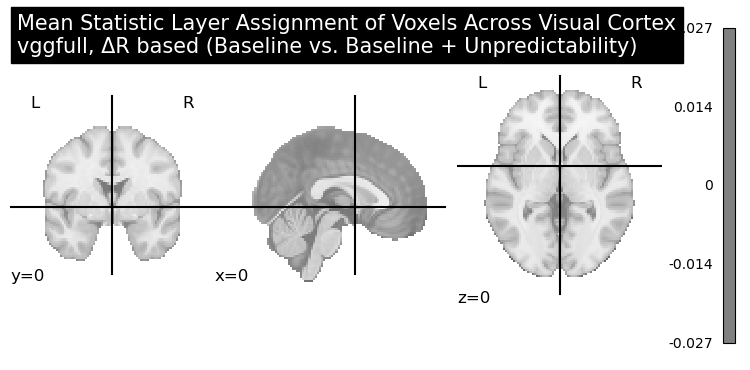

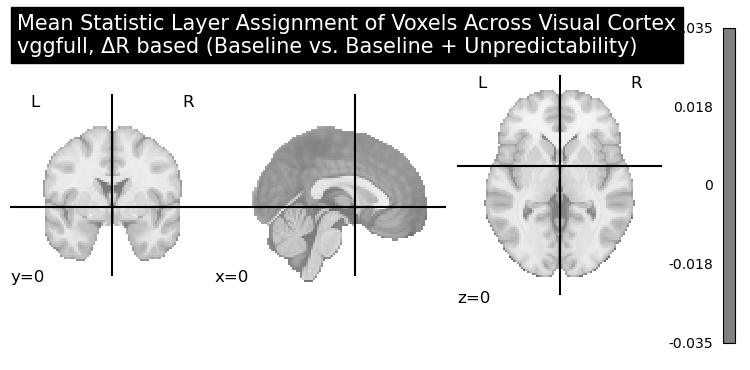

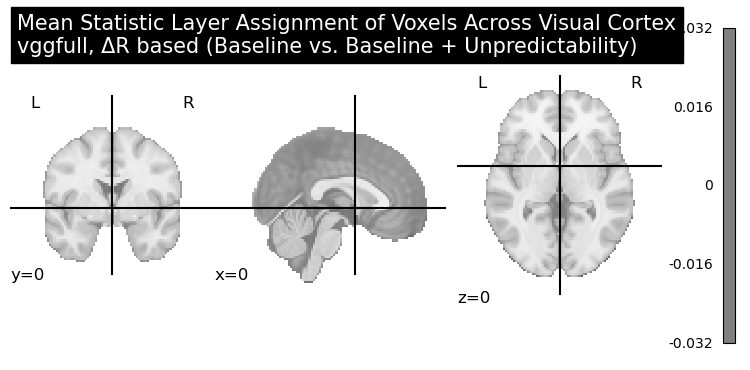

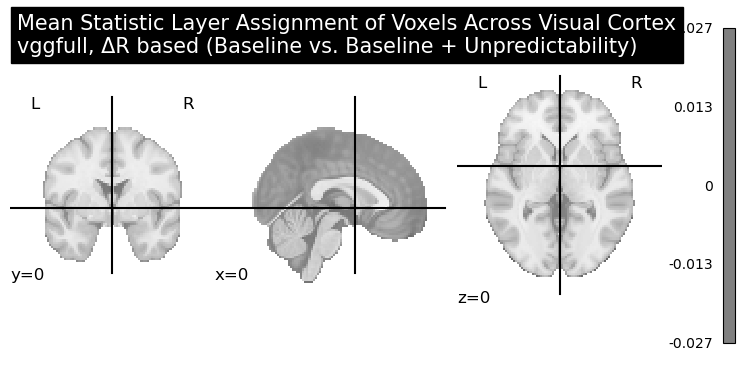

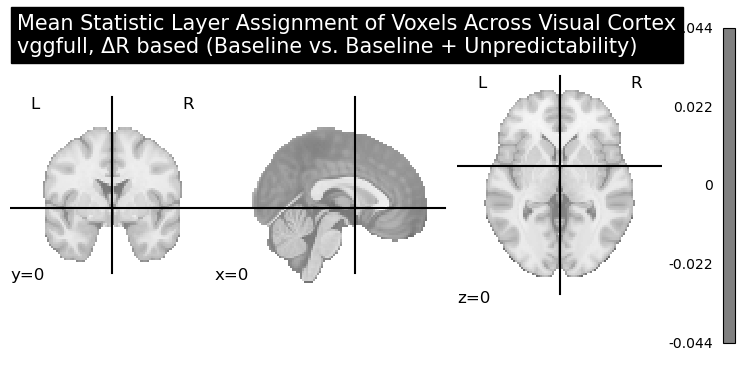

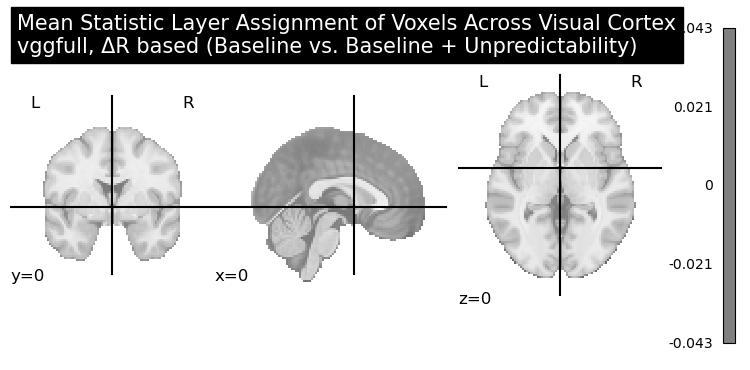

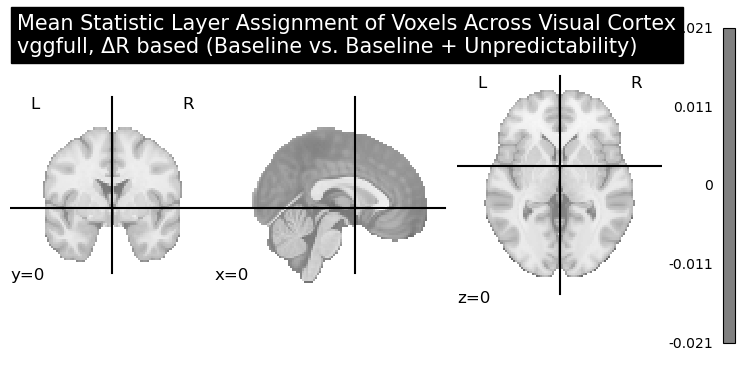

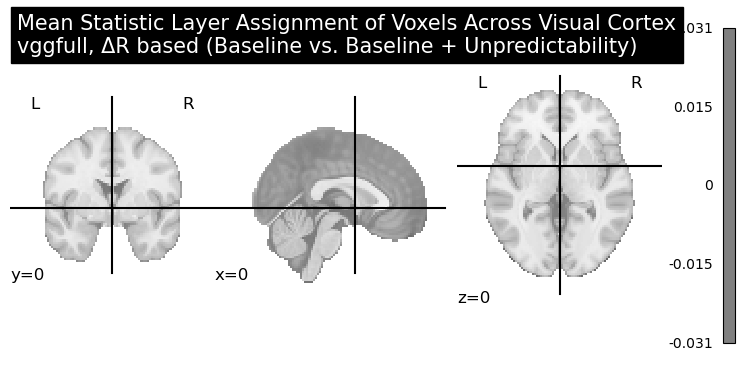

In [3]:
for subject in NSP.subjects:
    print(f"Working on {subject}")
    # subject = "subj05"
    reg_to_nifti(subject=subject,
                reg_type="unpred",
                model="vggfull",
                # assign_stat="max",
                reg_stat="delta_r",
                plot_brain=True,
                plot_lay_assign=True,
                save_nifti=True,
                verbose=True,
                custom_subfolder="vggfull_gabor_baseline_allfilts",
                mean_delta_r=True,
                )

In [4]:
# Turn the mean delta r outtputs into .mgz surface files
for subject in NSP.subjects:
# print(f"Working on {subject}")  
        
        vol_to_surf(subject=subject,
                source_file_name="unpredvggfull_gabor_baseline_allfilts_vggfull_delta_r.nii",
                interpmethod="cubic",
                )

Working on subj01
        x   y   z roi  delta_r_2  delta_r_3  delta_r_4  delta_r_5  delta_r_6  \
0      56   8  75  V1   0.910208   1.000000   0.976121   0.963162   0.920683   
1      56   9  74  V1   0.855200   0.951745   0.946517   0.942630   0.887000   
2      56   9  76  V1   0.840212   0.915700   0.898853   0.883672   0.865676   
3      56  10  75  V1   0.872362   0.952705   0.939629   0.924489   0.890951   
4      56  10  76  V1   0.919541   1.000000   0.961799   0.944977   0.908704   
...   ...  ..  ..  ..        ...        ...        ...        ...        ...   
2521  113  26  69  V4   0.928444   0.896576   0.892132   0.847695   0.876348   
2522  113  28  61  V4   0.249049   0.066957   0.078852   0.000000   0.170167   
2523  114  25  69  V4   0.929781   0.947744   0.889039   0.840353   0.845556   
2524  114  26  67  V4   0.778696   0.511295   0.407859   0.269584   0.537424   
2525  114  27  64  V4   0.038650   0.000000   0.011510   0.002713   0.035870   

      delta_r_7  ... 

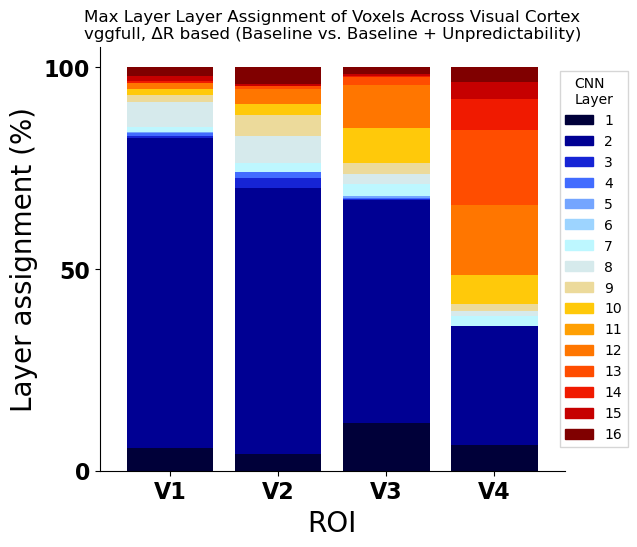

Working on subj02
        x   y   z roi  delta_r_2  delta_r_3  delta_r_4  delta_r_5  delta_r_6  \
0      59   7  61  V1   0.967160   0.994160   1.000000   0.993749   0.988626   
1      59   8  62  V1   0.979063   1.000000   0.999219   0.998692   0.975822   
2      59  10  59  V1   1.000000   0.977796   0.890836   0.903552   0.841364   
3      59  10  60  V1   0.708413   0.682737   0.809488   0.820783   0.897134   
4      59  12  59  V1   0.982501   1.000000   0.994534   0.981940   0.973818   
...   ...  ..  ..  ..        ...        ...        ...        ...        ...   
1563  104  35  54  V4   0.128575   0.000000   0.083830   0.081842   0.200509   
1564  105  25  55  V4   0.786053   0.616715   0.663896   0.647148   0.851424   
1565  105  26  54  V4   0.431546   0.324931   0.458336   0.434895   0.634157   
1566  105  27  53  V4   0.136923   0.000000   0.087042   0.090204   0.233736   
1567  105  28  53  V4   0.622514   1.000000   0.514265   0.541998   0.387345   

      delta_r_7  ... 

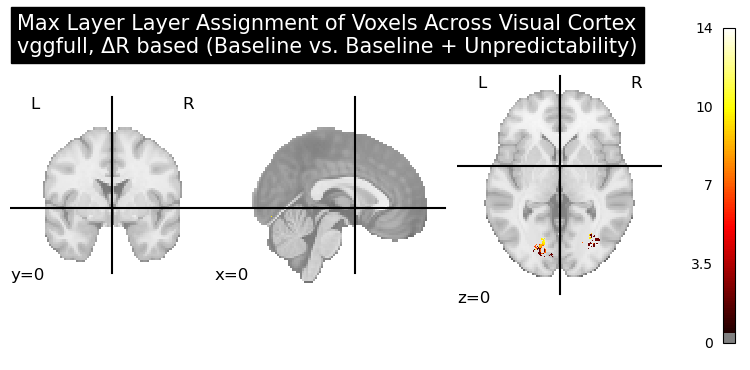

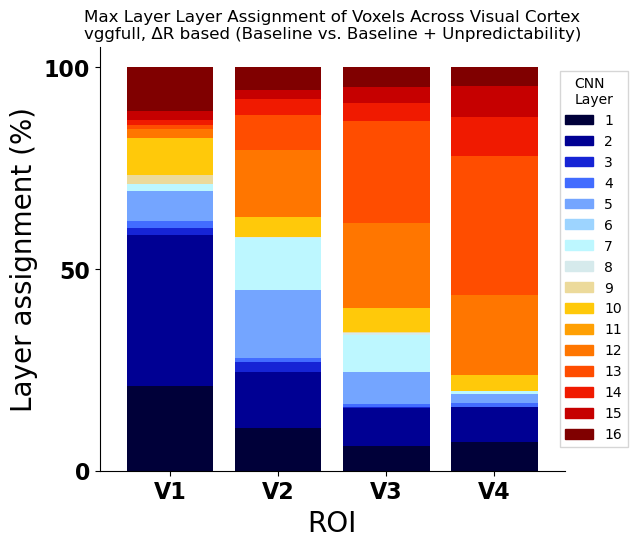

Working on subj03
        x   y   z roi  delta_r_2  delta_r_3  delta_r_4  delta_r_5  delta_r_6  \
0      58  20  40  V1   0.972047        1.0   0.977969   0.949384   0.945604   
1      59  17  42  V1   0.963467        1.0   0.934829   0.901357   0.874988   
2      59  20  39  V1   0.945424        1.0   0.940949   0.899229   0.880962   
3      60  15  46  V1   0.924757        1.0   0.865673   0.828961   0.760917   
4      60  17  41  V1   0.986619        1.0   0.974072   0.956588   0.934846   
...   ...  ..  ..  ..        ...        ...        ...        ...        ...   
1998  114  34  49  V4   0.090191        0.0   0.090202   0.064624   0.210641   
1999  115  31  55  V4   0.140284        0.0   0.055113   0.016992   0.172058   
2000  115  32  50  V4   0.151353        0.0   0.139265   0.097213   0.174305   
2001  115  32  55  V4   0.122951        0.0   0.062659   0.025234   0.147873   
2002  115  34  48  V4   0.068273        0.0   0.046508   0.028341   0.106230   

      delta_r_7  ... 

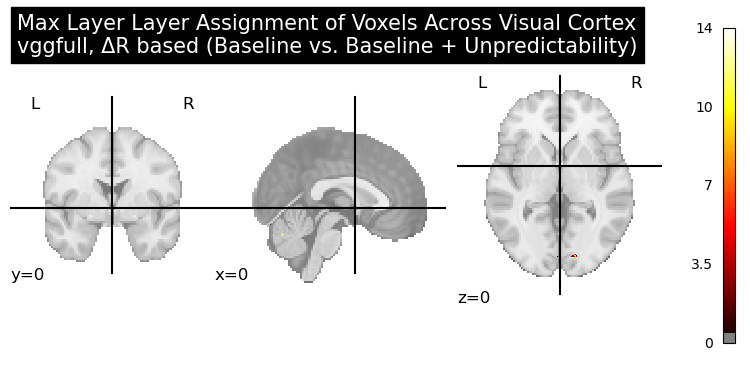

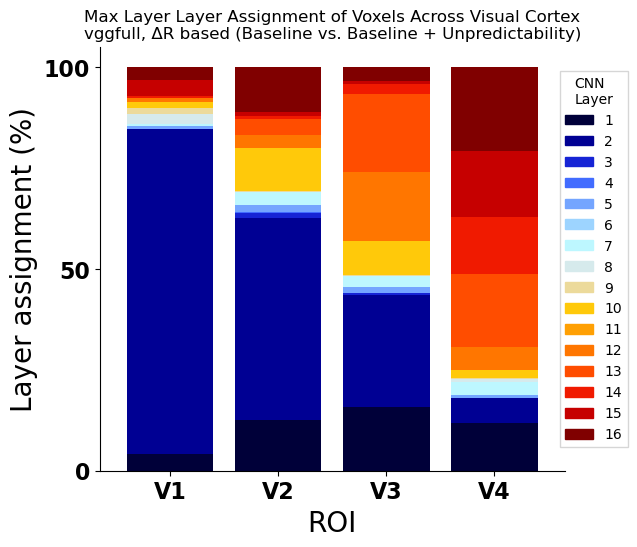

Working on subj04
        x   y   z roi  delta_r_2  delta_r_3  delta_r_4  delta_r_5  delta_r_6  \
0      57  15  50  V1   0.962321   0.982826   1.000000   0.994917   0.962681   
1      57  17  48  V1   0.983431   1.000000   0.972289   0.967230   0.948997   
2      58  14  49  V1   0.882013   0.852269   0.896578   0.831480   0.931306   
3      58  14  50  V1   1.000000   0.934306   0.962297   0.900563   0.878244   
4      58  15  49  V1   0.566062   0.561159   0.658381   0.643841   0.753959   
...   ...  ..  ..  ..        ...        ...        ...        ...        ...   
1144  109  24  53  V4   0.151775   0.000000   0.069617   0.055392   0.188107   
1145  109  24  54  V4   0.166237   0.000000   0.074248   0.056296   0.201281   
1146  109  24  55  V4   0.187336   0.000000   0.097985   0.082660   0.243973   
1147  109  25  53  V4   0.101018   0.000000   0.047630   0.037124   0.135223   
1148  109  25  56  V4   0.157591   0.000000   0.120578   0.109248   0.249913   

      delta_r_7  ... 

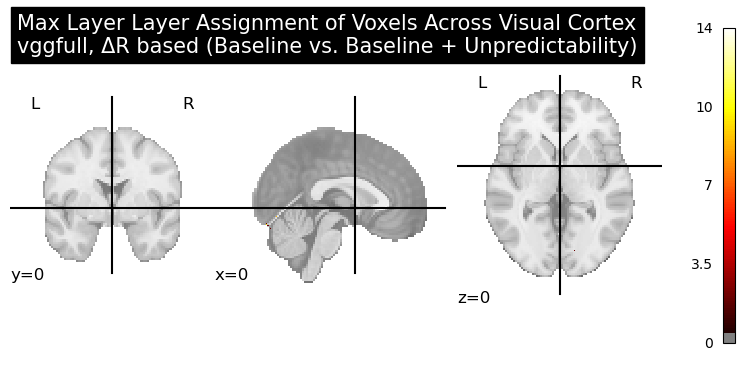

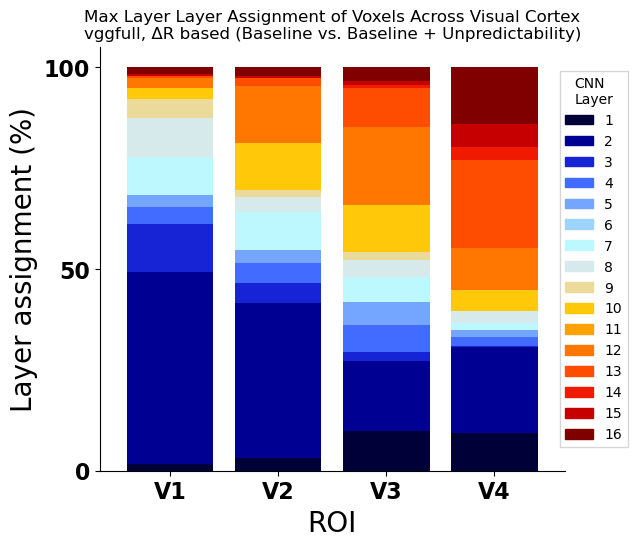

Working on subj05
        x   y   z roi  delta_r_2  delta_r_3  delta_r_4  delta_r_5  delta_r_6  \
0      46  13  50  V1   0.944294   1.000000   0.891805   0.864607   0.809122   
1      47  12  50  V1   0.614613   0.681614   0.463924   0.459176   0.313033   
2      47  14  52  V1   0.953013   1.000000   0.980650   0.992873   0.973190   
3      47  15  51  V1   0.978819   1.000000   0.916730   0.918630   0.861983   
4      48  11  50  V1   0.865077   1.000000   0.869963   0.827299   0.698297   
...   ...  ..  ..  ..        ...        ...        ...        ...        ...   
1968  109  26  46  V4   0.059004   0.000000   0.038335   0.026259   0.098387   
1969  109  26  47  V4   0.109449   0.000000   0.032400   0.016793   0.107998   
1970  109  27  46  V4   0.135085   0.000000   0.091272   0.058964   0.237842   
1971  109  30  44  V4   0.015993   0.003242   0.007110   0.000000   0.029168   
1972  110  27  46  V4   0.098101   0.000000   0.046144   0.029930   0.151948   

      delta_r_7  ... 

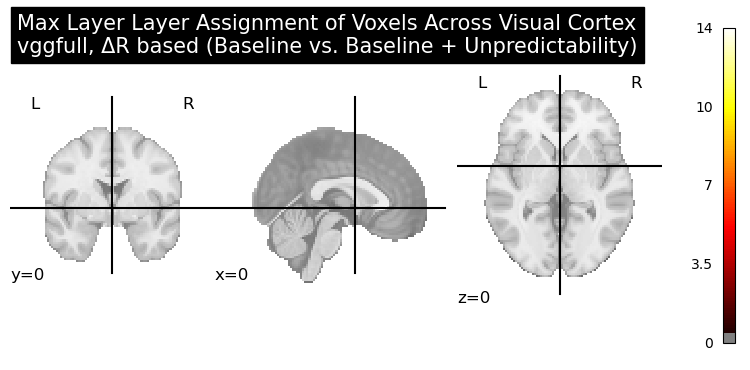

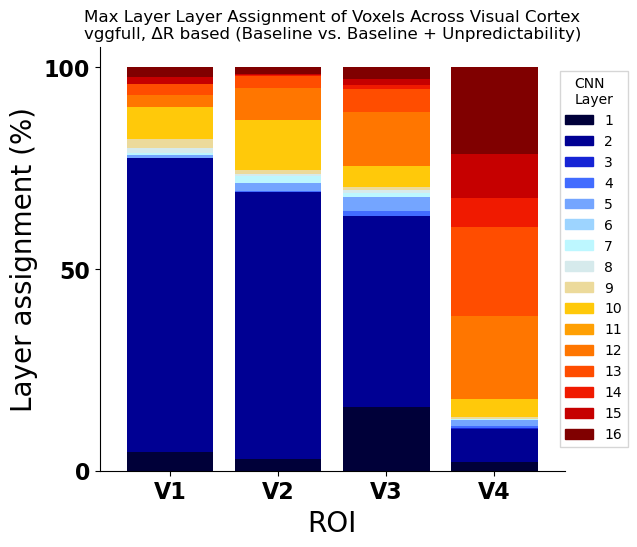

Working on subj06
        x   y   z roi  delta_r_2  delta_r_3  delta_r_4  delta_r_5  delta_r_6  \
0      62  25  75  V1   0.678198   0.671182   0.662200   0.610159   0.656610   
1      62  25  76  V1   0.627135   0.571133   0.592555   0.557454   0.633325   
2      64  13  86  V1   0.885997   1.000000   0.918871   0.917277   0.842848   
3      64  16  60  V1   0.970453   1.000000   0.966005   0.935841   0.933551   
4      64  20  85  V1   0.920286   1.000000   0.907829   0.895054   0.805790   
...   ...  ..  ..  ..        ...        ...        ...        ...        ...   
2044  107  26  53  V4   0.152661   0.041967   0.048515   0.000000   0.109053   
2045  107  27  53  V4   0.148788   0.052954   0.042742   0.000000   0.080248   
2046  108  25  53  V4   0.303725   0.210988   0.097733   0.000000   0.097116   
2047  108  26  53  V4   0.249857   0.122504   0.068387   0.000000   0.096364   
2048  108  27  52  V4   0.150983   0.026881   0.035550   0.000000   0.103330   

      delta_r_7  ... 

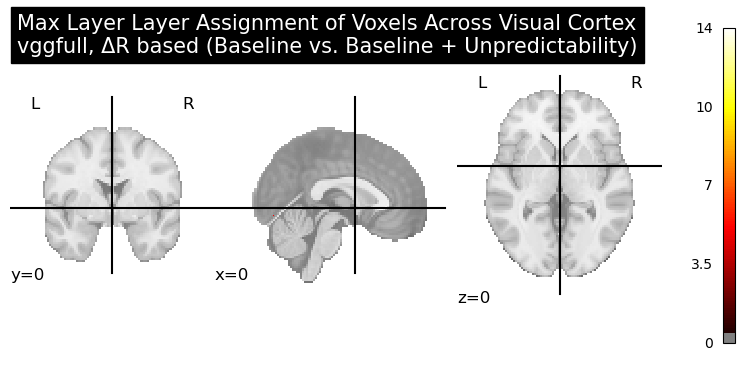

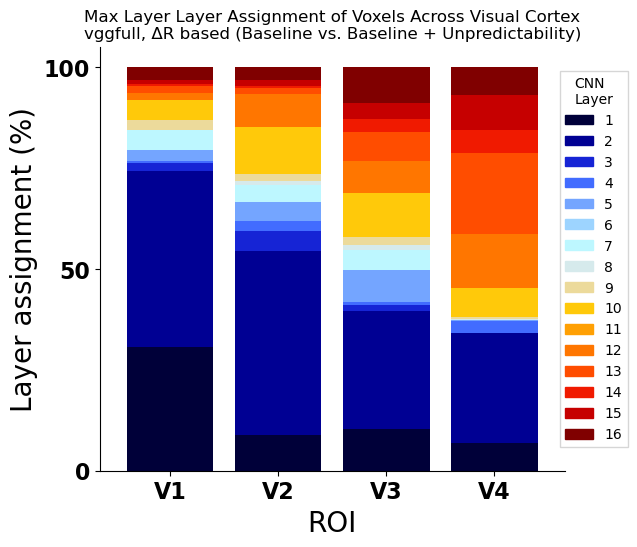

Working on subj07
        x   y   z roi  delta_r_2  delta_r_3  delta_r_4  delta_r_5  delta_r_6  \
0      42   9  72  V1   0.834906   0.860570   0.890878   0.880902   0.880478   
1      43   9  71  V1   0.971889   0.943519   0.953051   0.915096   0.955451   
2      43  10  70  V1   0.984220   0.998933   0.968009   0.937087   0.948805   
3      43  10  71  V1   0.984758   0.966764   0.958112   0.923568   0.950396   
4      43  10  72  V1   0.893000   0.850212   0.856160   0.817238   0.862526   
...   ...  ..  ..  ..        ...        ...        ...        ...        ...   
2210  104  25  50  V4   0.062131   0.000000   0.027675   0.022471   0.088631   
2211  104  25  51  V4   0.127769   0.000000   0.054178   0.024231   0.187598   
2212  105  24  50  V4   0.109486   0.000000   0.030376   0.000238   0.114960   
2213  105  24  51  V4   0.203987   0.057714   0.066121   0.000000   0.173197   
2214  105  25  50  V4   0.085090   0.000000   0.034834   0.013046   0.109988   

      delta_r_7  ... 

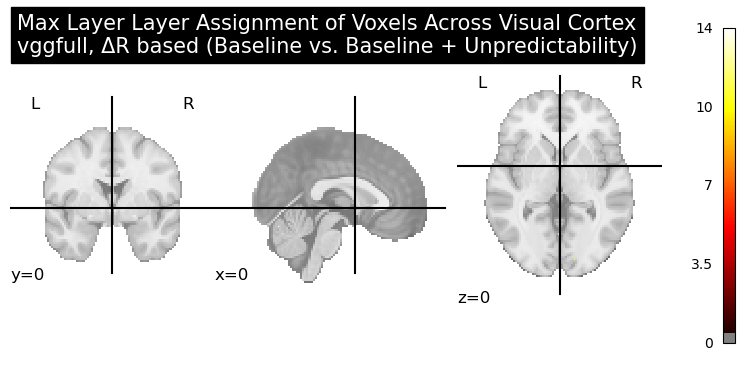

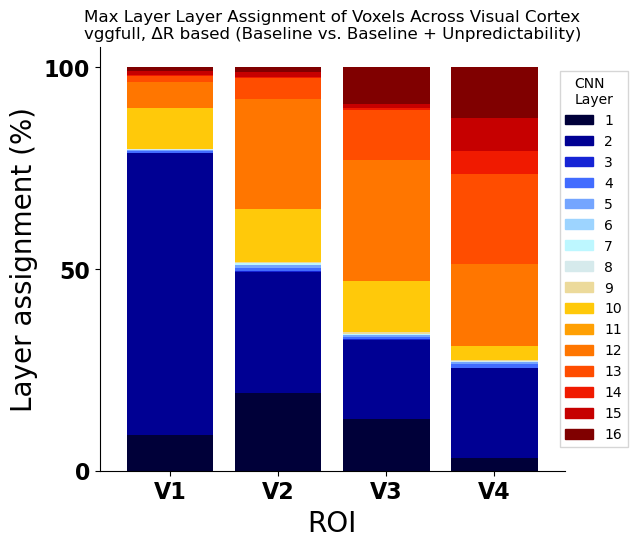

Working on subj08
        x   y   z roi  delta_r_2  delta_r_3  delta_r_4  delta_r_5  delta_r_6  \
0      47  19  43  V1   0.294342   0.157437   0.133951   0.125137   0.038515   
1      47  20  43  V1   0.164059   0.058488   0.099745   0.086848   0.000000   
2      47  22  42  V1   0.941668   1.000000   0.942759   0.934068   0.913340   
3      47  23  40  V1   0.907534   1.000000   0.816463   0.763508   0.740801   
4      48  20  41  V1   0.187383   0.144645   0.031984   0.000000   0.006782   
...   ...  ..  ..  ..        ...        ...        ...        ...        ...   
1280  102  24  39  V4   0.096496   0.014550   0.024551   0.000000   0.114799   
1281  102  25  39  V4   0.180129   0.117986   0.054118   0.000000   0.155483   
1282  103  20  44  V4   0.122253   0.164987   0.152053   0.184824   0.086486   
1283  103  23  41  V4   0.222537   0.213778   0.071796   0.000000   0.078989   
1284  103  24  41  V4   0.129465   0.102238   0.062488   0.000000   0.098499   

      delta_r_7  ... 

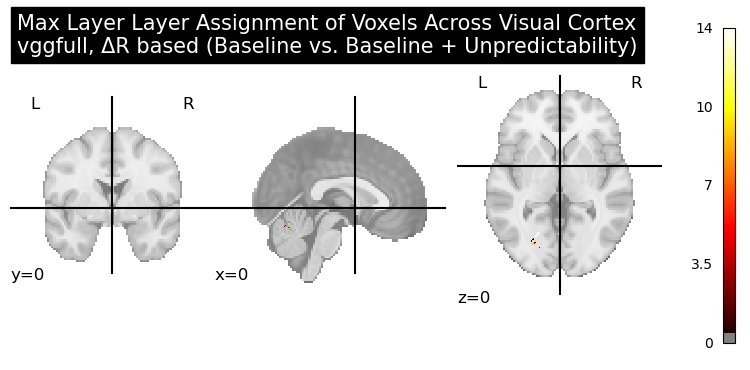

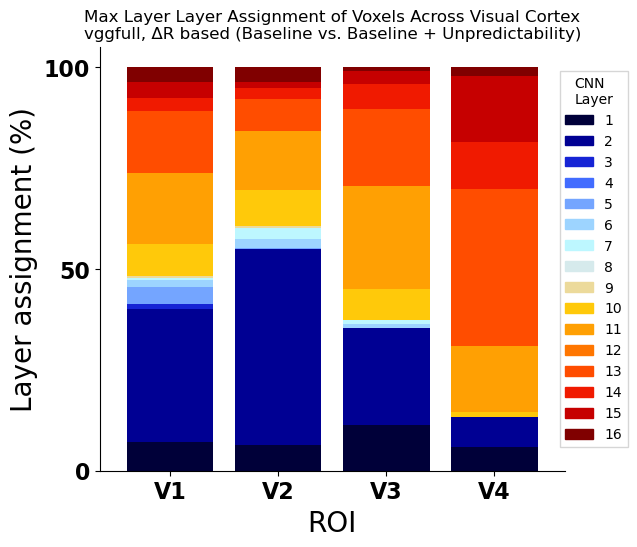

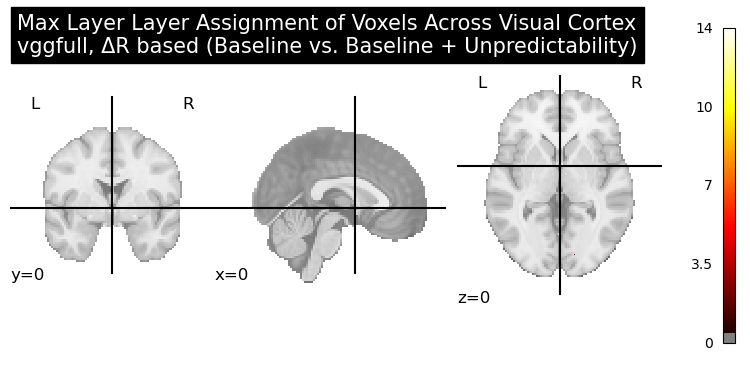

In [4]:
### LAYASSIGN STATS

for subject in NSP.subjects:
    print(f"Working on {subject}")
    # subject = "subj05"
    reg_to_nifti(subject=subject,
                reg_type="unpred",
                model="vggfull",
                assign_stat="max",
                reg_stat="delta_r",
                plot_brain=True,
                plot_lay_assign=True,
                save_nifti=True,
                verbose=True,
                custom_subfolder="vggfull_gabor_baseline",
                )

In [5]:


for subject in NSP.subjects:
# print(f"Working on {subject}")  
        
        vol_to_surf(subject=subject,
                source_file_name="unpredvggfull_gabor_baseline_vggfull_layassign_max",
                interpmethod="wta",
                )

### Full VGG16 Encoding results 

Working on subj03
         x   y   z roi  delta_r_1  delta_r_3  delta_r_6  delta_r_8  \
0       57  23  38  V1   0.034141   0.077562   0.575535   1.000000   
1       57  23  39  V1   0.257697   0.301548   0.530366   1.000000   
2       57  24  38  V1   0.303872   0.357481   0.666647   1.000000   
3       57  24  39  V1   0.176477   0.287509   0.738527   0.741665   
4       57  25  39  V1   0.190973   0.056850   0.802032   0.665413   
...    ...  ..  ..  ..        ...        ...        ...        ...   
21876  116  33  48  V4   0.072829   0.336876   0.626678   0.925220   
21877  116  33  49  V4   0.033618   0.274883   0.299902   0.133830   
21878  116  33  50  V4   0.000000   0.053412   0.465896   0.467376   
21879  116  34  48  V4   0.000000   0.212346   0.580516   0.149953   
21880  117  33  50  V4   0.000000   0.244218   0.310800   0.606398   

       delta_r_11  delta_r_13  ...  delta_r_20  delta_r_22  delta_r_25  \
0        0.634049    0.825118  ...    0.796387    0.605937    0.906

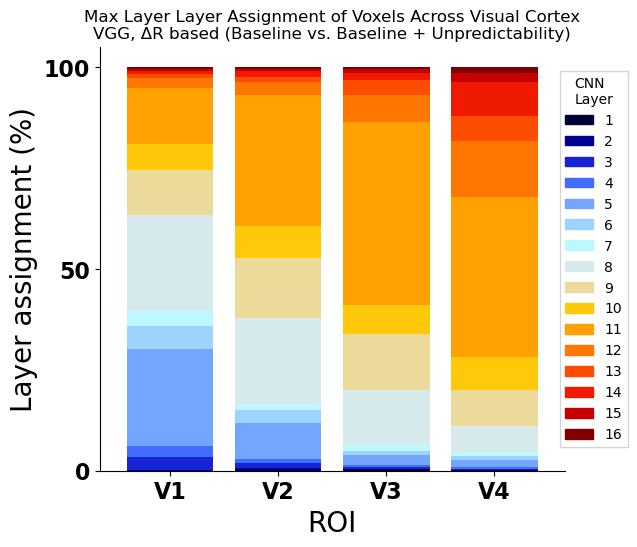

Working on subj04
         x   y   z roi  delta_r_1  delta_r_3  delta_r_6  delta_r_8  \
0       56  13  49  V1   0.098902   0.115515   0.374590   0.000000   
1       56  15  48  V1   0.000000   0.613621   0.724978   0.892775   
2       57  13  49  V1   0.025548   0.285382   0.354058   0.452702   
3       57  14  48  V1   0.305064   0.470375   0.687544   0.257499   
4       57  14  49  V1   0.119636   0.394206   0.654333   0.672257   
...    ...  ..  ..  ..        ...        ...        ...        ...   
17661  110  26  56  V4   0.581046   0.278223   0.276090   0.346268   
17662  110  27  53  V4   0.538903   0.556207   0.134606   0.110905   
17663  110  27  54  V4   0.177319   0.162947   0.283567   0.000000   
17664  110  33  47  V4   0.000000   0.186353   0.264289   0.301967   
17665  110  33  48  V4   0.000000   0.177858   0.356679   0.286099   

       delta_r_11  delta_r_13  ...  delta_r_20  delta_r_22  delta_r_25  \
0        0.053751    0.338669  ...    0.175162    0.820539    1.000

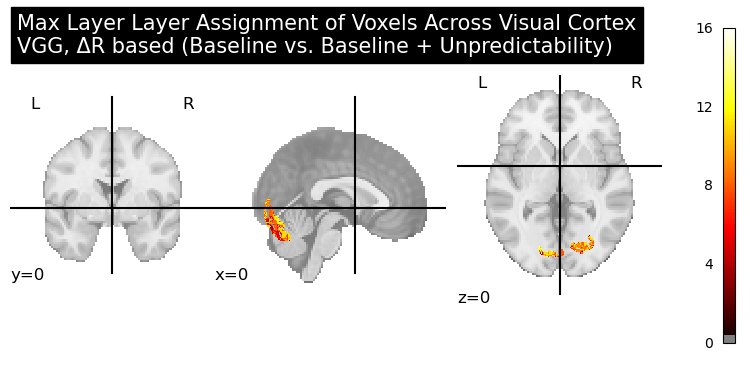

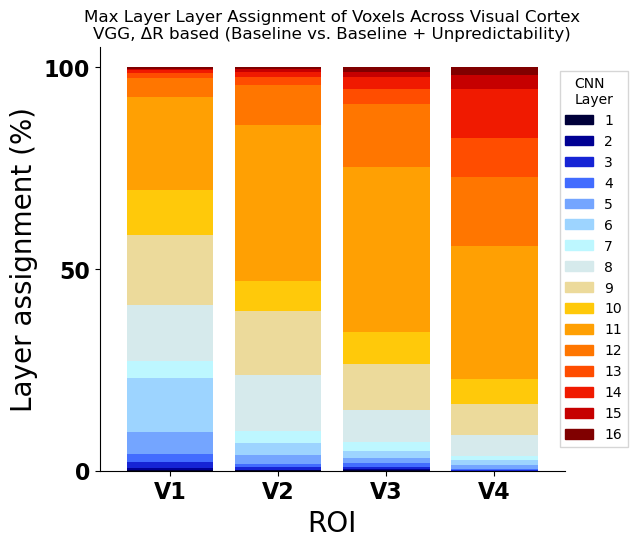

Working on subj05
         x   y   z roi  delta_r_1  delta_r_3  delta_r_6  delta_r_8  \
0       46  13  50  V1   0.020241   0.240197   0.000000   0.668988   
1       47  11  51  V1   0.000000   0.442770   0.769417   1.000000   
2       47  12  50  V1   0.000000   0.511863   0.581048   0.737378   
3       47  12  51  V1   0.024619   0.958002   0.445324   0.453476   
4       47  13  50  V1   0.355239   0.424604   0.000000   0.198663   
...    ...  ..  ..  ..        ...        ...        ...        ...   
21373  109  31  44  V4   0.494752   0.000000   0.150263   0.383634   
21374  109  31  45  V4   0.401363   0.250426   0.005485   0.398734   
21375  109  32  44  V4   0.342192   0.099472   0.000000   0.230174   
21376  110  27  45  V4   0.000000   0.034260   0.761725   0.306814   
21377  110  27  46  V4   0.043199   0.129045   0.116034   0.000000   

       delta_r_11  delta_r_13  ...  delta_r_20  delta_r_22  delta_r_25  \
0        0.607801    0.356482  ...    0.494579    0.690600    0.685

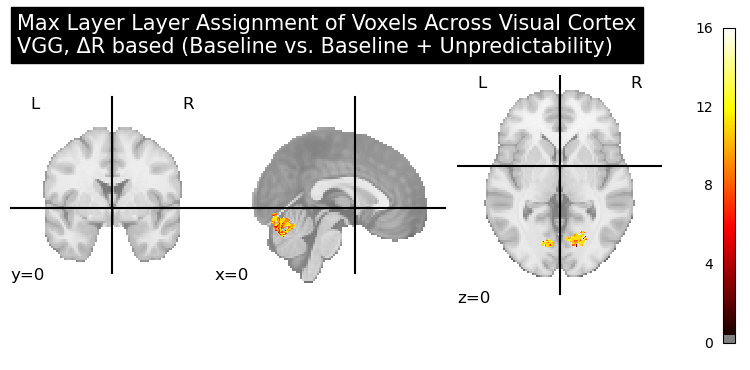

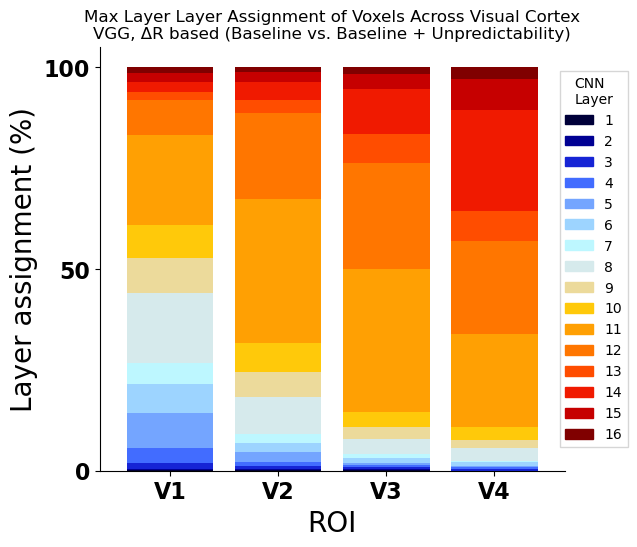

Working on subj06
         x   y   z roi  delta_r_1  delta_r_3  delta_r_6  delta_r_8  \
0       57  20  81  V1   0.202722   0.148877   0.040998   0.000000   
1       57  21  81  V1   0.000000   0.086600   0.243299   0.119456   
2       57  22  81  V1   0.000000   0.045617   0.429386   0.196445   
3       58  18  83  V1   0.000000   0.249602   0.421262   0.435426   
4       58  18  84  V1   0.000000   0.251125   0.431162   0.425035   
...    ...  ..  ..  ..        ...        ...        ...        ...   
23355  110  26  52  V4   0.000000   0.117364   0.233632   0.384666   
23356  110  27  49  V4   0.000000   0.204390   0.298769   0.495469   
23357  110  27  50  V4   0.000000   0.208911   0.287694   0.352873   
23358  110  27  51  V4   0.000000   0.143359   0.367139   0.350526   
23359  110  28  49  V4   0.000000   0.194842   0.332663   0.519064   

       delta_r_11  delta_r_13  ...  delta_r_20  delta_r_22  delta_r_25  \
0        0.398318    0.683488  ...    0.797531    0.447734    0.990

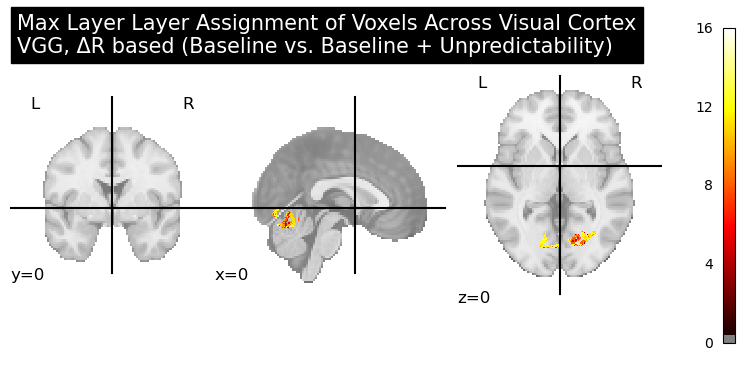

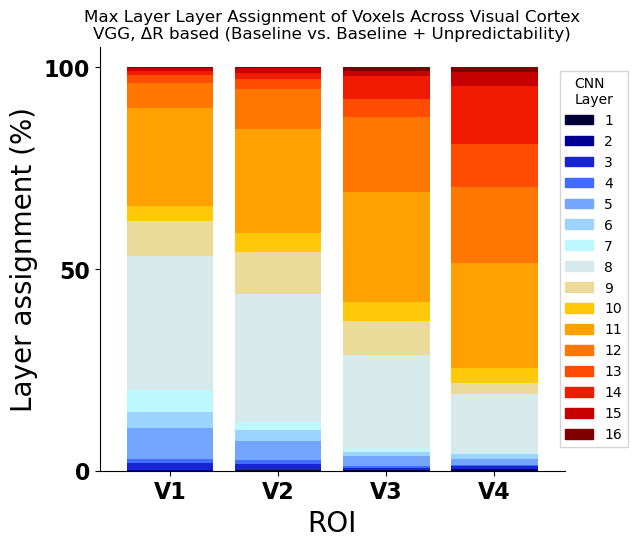

Working on subj07
         x   y   z roi  delta_r_1  delta_r_3  delta_r_6  delta_r_8  \
0       42   9  72  V1   0.108536   0.247199   0.220388   0.488120   
1       43   9  69  V1   0.000000   0.308582   0.554304   0.864008   
2       43   9  71  V1   0.000000   0.287589   0.595305   0.607002   
3       43   9  72  V1   0.019307   0.501824   0.628390   0.607229   
4       43   9  73  V1   0.065215   0.224396   0.484485   0.499694   
...    ...  ..  ..  ..        ...        ...        ...        ...   
18746  105  25  49  V4   0.000000   0.007566   0.315290   0.180687   
18747  105  25  50  V4   0.000000   0.164076   0.271646   0.284019   
18748  105  26  48  V4   0.013011   0.000000   0.195064   0.140742   
18749  106  24  50  V4   0.000000   0.048497   0.190817   0.267408   
18750  106  25  48  V4   0.035498   0.000000   0.115901   0.249856   

       delta_r_11  delta_r_13  ...  delta_r_20  delta_r_22  delta_r_25  \
0        0.692204    0.660763  ...    0.860231    1.000000    0.503

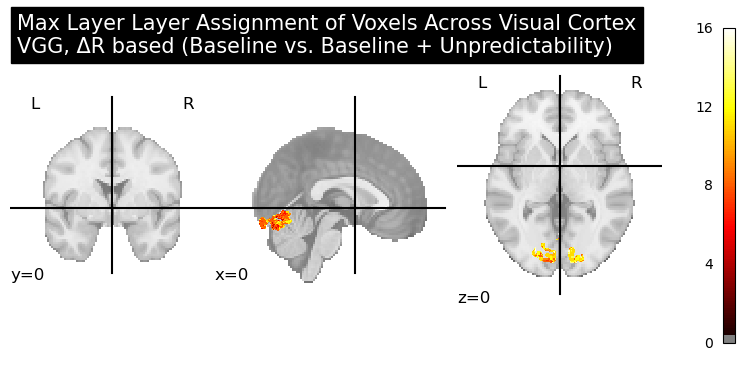

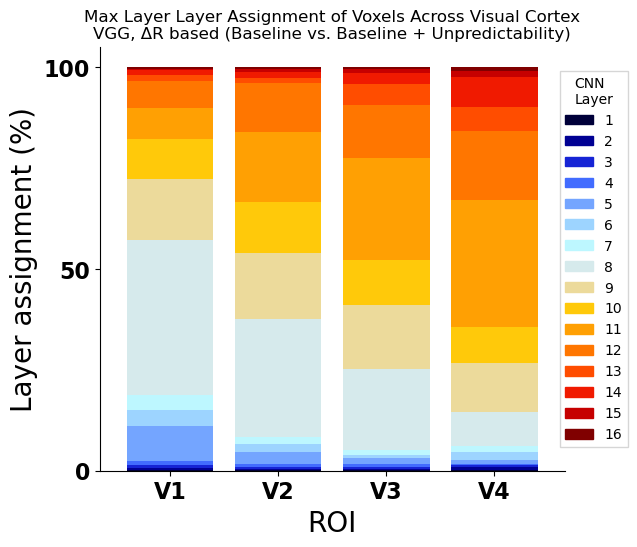

Working on subj08
         x   y   z roi  delta_r_1  delta_r_3  delta_r_6  delta_r_8  \
0       46  20  40  V1   0.310823   0.730877   0.719439   0.893500   
1       46  20  41  V1   0.321930   0.484859   0.535828   0.855027   
2       46  20  42  V1   0.000000   0.340752   0.587619   0.754127   
3       46  21  39  V1   0.000000   0.544343   0.710983   0.623301   
4       46  21  40  V1   0.000000   0.661104   0.747095   0.810605   
...    ...  ..  ..  ..        ...        ...        ...        ...   
20190  104  18  45  V4   0.000000   0.138556   0.779988   0.729731   
20191  104  18  46  V4   0.000000   0.034900   0.234050   0.353194   
20192  104  19  44  V4   0.316292   0.370137   0.060438   0.206566   
20193  104  19  45  V4   1.000000   0.818469   0.339485   0.714758   
20194  104  20  43  V4   0.000000   0.879784   0.713834   0.378973   

       delta_r_11  delta_r_13  ...  delta_r_20  delta_r_22  delta_r_25  \
0        0.714533    0.955730  ...    0.706162    0.810347    0.884

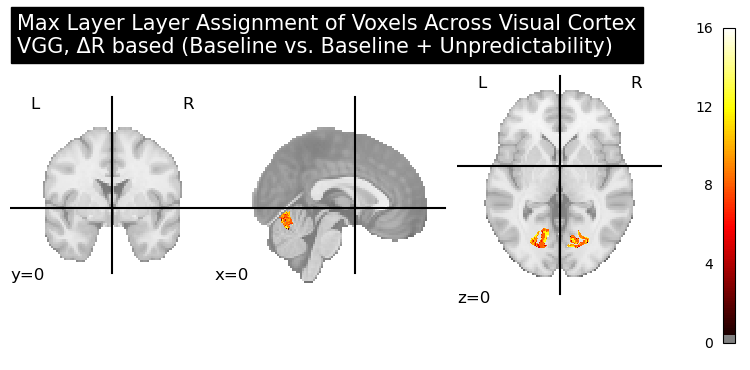

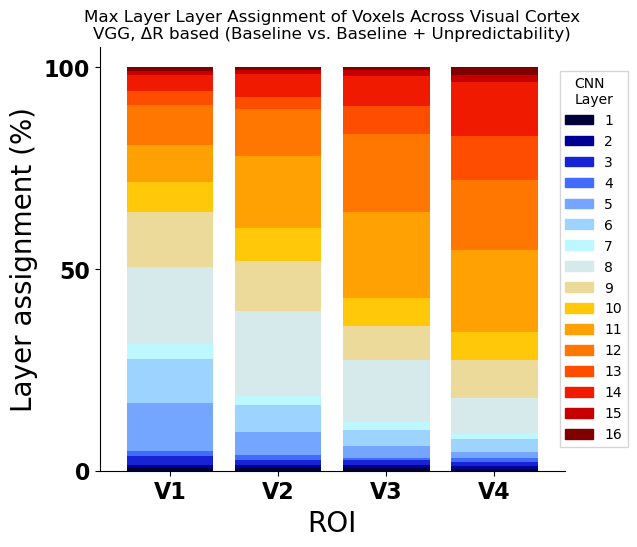

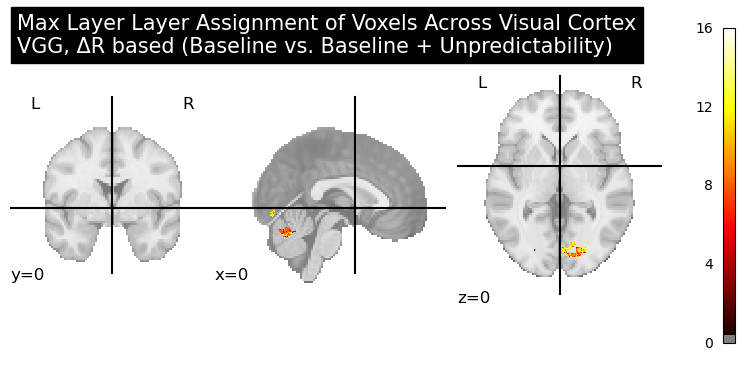

In [4]:


for subject in NSP.subjects[2:]:
    print(f"Working on {subject}")
    # subject = "subj05"
    reg_to_nifti(subject=subject,
                reg_type="encoding",
                model="VGG",
                assign_stat="max",
                reg_stat="delta_r",
                plot_brain=True,
                plot_lay_assign=True,
                save_nifti=True,
                verbose=True,
                )

In [12]:
# /home/rfpred/data/custom_files/subj08/stat_volumes/encoding_VGG_layassign_max.nii
for subject in NSP.subjects:
# print(f"Working on {subject}")  
        
        vol_to_surf(subject=subject,
                source_file_name="encoding_VGG_layassign_max",
                interpmethod="wta",
                )

### Mean unpred Xpred results

In [9]:


for subject in NSP.subjects:
    print(f"Working on {subject}")
    # subject = "subj05"
    reg_to_nifti(subject=subject,
                reg_type="unpred",
                model="vggfull",
                # assign_stat="max",
                reg_stat="beta_unpred",
                plot_brain=False,
                plot_lay_assign=False,
                save_nifti=True,
                verbose=True,
                mean_delta_r=True,
                peripheral=True,
                peri_ecc=2.0,
                peri_angle=330,
                mean_unpred=True,
                )

Working on subj01
       x   y   z roi  beta_unpred_1 Mean Statistic
0     58  14  60  V1       0.122373       0.122373
1     60   6  70  V1       0.048858       0.048858
2     60   6  75  V1       0.038052       0.038052
3     60   8  74  V1       0.035147       0.035147
4     61   6  75  V1       0.050174       0.050174
..   ...  ..  ..  ..            ...            ...
193   46  24  60  V4       0.013025       0.013025
194   49  25  60  V4      -0.004449      -0.004449
195   49  26  60  V4      -0.006877      -0.006877
196   96  22  60  V4      -0.034799      -0.034799
197  106  21  62  V4       0.057768       0.057768

[198 rows x 6 columns]
Working on subj02
       x   y   z roi  beta_unpred_1 Mean Statistic
0     61   8  64  V1       0.037193       0.037193
1     61  14  72  V1       0.072709       0.072709
2     62  12  74  V1       0.096429       0.096429
3     62  12  75  V1       0.154717       0.154717
4     62  13  72  V1       0.054574       0.054574
..   ...  ..  ..  ..  

In [10]:
for subject in NSP.subjects:
# print(f"Working on {subject}")  
        
        vol_to_surf(subject=subject,
                source_file_name="unpred_peri_ecc2.0_angle330_mean_unpred_vggfull_beta_unpred",
                interpmethod="cubic",
                )

### Peripheral results tryout

In [6]:
for subject in NSP.subjects:
    print(f"Working on {subject}")
    # subject = "subj05"
    reg_to_nifti(subject=subject,
                reg_type="unpred",
                model="vggfull",
                assign_stat="max",
                reg_stat="R",
                plot_brain=False,
                plot_lay_assign=False,
                save_nifti=True,
                verbose=True,
                mean_delta_r=False,
                # peripheral=True,
                # peri_ecc=2.0,
                # peri_angle=90
                )

Working on subj01
        x   y   z roi       R_2       R_3       R_4       R_5       R_6  \
0      56   8  75  V1  0.071258  0.075079  0.073251  0.072781  0.070970   
1      56   9  74  V1  0.037536  0.040949  0.040035  0.040002  0.038152   
2      56   9  76  V1  0.050872  0.053501  0.052431  0.052108  0.051515   
3      56  10  75  V1  0.039483  0.041818  0.040966  0.040790  0.039803   
4      56  10  76  V1  0.040446  0.042842  0.041389  0.041171  0.040102   
...   ...  ..  ..  ..       ...       ...       ...       ...       ...   
2521  113  26  69  V4  0.136464  0.136463  0.135771  0.134846  0.135099   
2522  113  28  61  V4  0.007003  0.006513  0.006104  0.005729  0.006373   
2523  114  25  69  V4  0.115529  0.116371  0.114761  0.113676  0.113560   
2524  114  26  67  V4  0.150638  0.149114  0.147882  0.146709  0.148815   
2525  114  27  64  V4  0.011993  0.011615  0.011589  0.011548  0.011756   

           R_7       R_8       R_9      R_10      R_11      R_12      R_13  \
0  

### Baseline model performance work

In [3]:


for subject in NSP.subjects:
    print(f"Working on {subject}")
    # subject = "subj05"
    reg_to_nifti(subject=subject,
                reg_type="unpred",
                model="vggfull",
                assign_stat="max",
                reg_stat="R",
                plot_brain=False,
                plot_lay_assign=False,
                save_nifti=True,
                verbose=True,
                mean_delta_r=False)

Working on subj01
        x   y   z roi       R_2       R_3       R_4       R_5       R_6  \
0      56   8  75  V1  0.071258  0.075079  0.073251  0.072781  0.070970   
1      56   9  74  V1  0.037536  0.040949  0.040035  0.040002  0.038152   
2      56   9  76  V1  0.050872  0.053501  0.052431  0.052108  0.051515   
3      56  10  75  V1  0.039483  0.041818  0.040966  0.040790  0.039803   
4      56  10  76  V1  0.040446  0.042842  0.041389  0.041171  0.040102   
...   ...  ..  ..  ..       ...       ...       ...       ...       ...   
2521  113  26  69  V4  0.136464  0.136463  0.135771  0.134846  0.135099   
2522  113  28  61  V4  0.007003  0.006513  0.006104  0.005729  0.006373   
2523  114  25  69  V4  0.115529  0.116371  0.114761  0.113676  0.113560   
2524  114  26  67  V4  0.150638  0.149114  0.147882  0.146709  0.148815   
2525  114  27  64  V4  0.011993  0.011615  0.011589  0.011548  0.011756   

           R_7       R_8       R_9      R_10      R_11      R_12      R_13  \
0  

In [4]:
for subject in NSP.subjects:
# print(f"Working on {subject}")  
        
        vol_to_surf(subject=subject,
                source_file_name="unpred_vggfull_R",
                interpmethod="cubic",
                )

### Make nifti files based on specific regression results

In [9]:
# for subject in NSP.subjects:
#     print(f"Working on {subject}")
#     # subject = "subj05"
#     reg_to_nifti(subject=subject,
#                 reg_type="unpred",
#                 model="vggfull",
#                 assign_stat="max",
#                 reg_stat="delta_r",
#                 plot_brain=False,
#                 plot_lay_assign=False,
#                 save_nifti=True,
#                 verbose=True,
#                 mean_delta_r=True)

for subject in NSP.subjects:
    print(f"Working on {subject}")
    # subject = "subj05"
    reg_to_nifti(subject=subject,
                reg_type="unpred",
                model="vggfull",
                assign_stat="max",
                reg_stat="beta_unpred",
                plot_brain=False,
                plot_lay_assign=False,
                save_nifti=True,
                verbose=True,
                mean_delta_r=True)

Working on subj01
        x   y   z roi  beta_unpred_2  beta_unpred_3  beta_unpred_4  \
0      56   8  75  V1       0.025816       0.027257       0.026944   
1      56   9  74  V1       0.019701       0.021052       0.020905   
2      56   9  76  V1       0.022882       0.023993       0.023863   
3      56  10  75  V1       0.019363       0.020361       0.020244   
4      56  10  76  V1       0.018772       0.019809       0.019527   
...   ...  ..  ..  ..            ...            ...            ...   
2521  113  26  69  V4       0.081230       0.080533       0.080477   
2522  113  28  61  V4       0.015642       0.015608       0.015480   
2523  114  25  69  V4       0.109543       0.109398       0.107979   
2524  114  26  67  V4       0.152391       0.148429       0.147189   
2525  114  27  64  V4       0.006012       0.004380       0.005383   

      beta_unpred_5  beta_unpred_6  beta_unpred_7  beta_unpred_8  \
0          0.026777       0.025891       0.026675       0.027938   
1    

In [10]:
for subject in NSP.subjects:
# print(f"Working on {subject}")  
        
        vol_to_surf(subject=subject,
                source_file_name="unpred_vggfull_beta_unpred",
                interpmethod="cubic",
                )

In [3]:
for subject in NSP.subjects:
    print(f"Working on {subject}")
    # subject = "subj05"
    reg_to_nifti(subject=subject,
                reg_type="encoding",
                model="VGG",
                assign_stat="max",
                reg_stat="delta_r",
                plot_brain=False,
                plot_lay_assign=False,
                save_nifti=True,
                verbose=True)

Working on subj01


         x   y   z roi  delta_r_1  delta_r_3  delta_r_6  delta_r_8  \
0       55   7  77  V1   0.000000   0.389488   0.592121   0.702513   
1       55  11  75  V1   0.226572   0.556553   0.967471   0.690021   
2       56   7  76  V1   0.000000   0.112139   0.502825   0.502724   
3       56   7  77  V1   0.444122   0.768348   0.785165   0.478667   
4       56   7  78  V1   1.000000   0.986705   0.414089   0.329508   
...    ...  ..  ..  ..        ...        ...        ...        ...   
27176  114  28  65  V4   0.163353   0.000000   0.613225   0.529675   
27177  114  28  66  V4   0.000000   0.041205   0.370714   0.501538   
27178  114  29  62  V4   0.000000   0.373132   0.599396   0.388931   
27179  115  28  64  V4   0.000000   0.177272   0.510690   0.707401   
27180  115  28  65  V4   0.116544   0.314804   0.398240   0.000000   

       delta_r_11  delta_r_13  delta_r_15  delta_r_18  delta_r_20  delta_r_22  \
0        0.795054    0.371885    0.035587    0.668762    0.413156    0.655852 

In [4]:
for subject in NSP.subjects:
# print(f"Working on {subject}")  
        
        vol_to_surf(subject=subject,
                source_file_name="encoding_VGG_layassign_max",
                interpmethod="wta",
                )

In [7]:
for subject in NSP.subjects:
    print(f"Working on {subject}")
# subject = "subj01"
    reg_to_nifti(subject=subject,
                reg_type="unpred",
                model="vgg-b",
                reg_stat="delta_beta",
                plot_brain=False,
                plot_lay_assign=False,
                save_nifti=True,
                verbose=True)

Working on subj01
        x   y   z roi  delta_beta_1  delta_beta_2  delta_beta_3  delta_beta_4  \
0      56   8  75  V1     -0.000001      0.002241      0.001205     -0.000262   
1      56   9  74  V1     -0.000077      0.001635      0.000536     -0.000865   
2      56   9  76  V1      0.000037      0.001953      0.001057     -0.000288   
3      56  10  75  V1      0.000259      0.001830      0.000978     -0.000371   
4      56  10  76  V1     -0.000125      0.001487      0.000644     -0.000654   
...   ...  ..  ..  ..           ...           ...           ...           ...   
2521  113  26  69  V4      0.002329      0.006052      0.007095      0.007935   
2522  113  28  61  V4      0.000341      0.000796      0.001194      0.002224   
2523  114  25  69  V4      0.003936      0.009536      0.011083      0.012477   
2524  114  26  67  V4      0.008692      0.013876      0.018739      0.022968   
2525  114  27  64  V4      0.001256      0.000399      0.002080      0.003588   

      del

Using a copy of the DataFrame for layer assignment, the original DataFrame will not be changed.
DataFrame changed: Values normalised by dividing by the maximum value for each voxel (row), min values capped at 0.
DataFrame changed: Added the maximum layer index to the DataFrame.


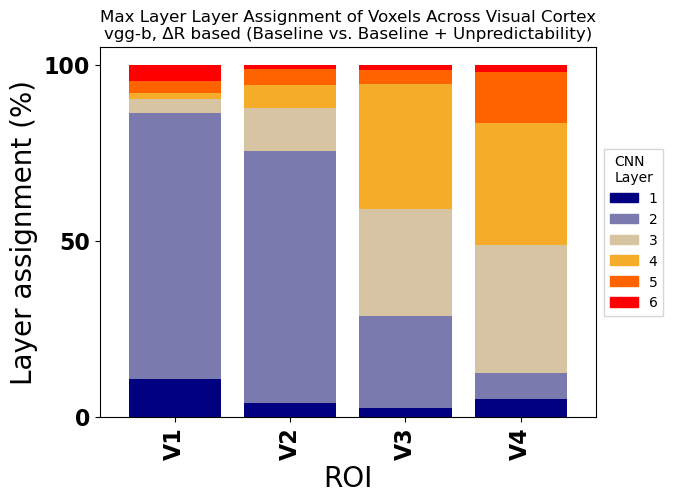

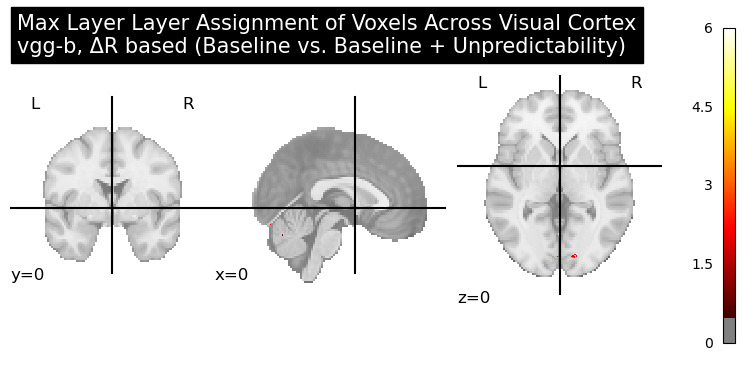

In [6]:
reg_to_nifti(subject="subj02",
             reg_type="unpred",
             model="vgg-b",
             assign_stat="max",
             reg_stat="delta_r",
             plot_brain=True,
             plot_lay_assign=True)

In [ ]:
for subject in NSP.subjects:
    print(f"Working on {subject}")
    reg_to_nifti(subject=subject,
                reg_type="unpred",
                model="vgg-b",
                assign_stat="max",
                reg_stat="delta_r",
                plot_brain=False,
                plot_lay_assign=True,
                save_nifti=True,
                mean_delta_r=True)

### Turn volume space brains into surface space brains

In [8]:
# For a single sub
for subject in NSP.subjects:

    vol_to_surf(subject=subject,
                source_file_name="unpred_vgg-b_delta_beta")

In [ ]:
# For a single sub
vol_to_surf(subject="subj02",
            source_file_name="unpred_vgg-b_layassign_max")

In [ ]:
for subject in NSP.subjects:
    vol_to_surf(subject=subject,
                source_file_name="unpred_vgg-b_mean_delta_r",
                interpmethod="nearest")

# VGG8 brain mappings

In [5]:
for subject in NSP.subjects:
    print(f"Working on {subject}")
# subject = "subj01"
    reg_to_nifti(subject=subject,
                reg_type="unpred",
                model="vgg8",
                reg_stat="delta_r",
                plot_brain=False,
                plot_lay_assign=False,
                save_nifti=True,
                mean_delta_r=True,
                verbose=True)

Working on subj01
Processing file vgg8_lay6_regdf.csv for layer 7
Processing file vgg8_lay3_regdf.csv for layer 4
Processing file vgg8_lay4_regdf.csv for layer 5
Processing file vgg8_lay0_regdf.csv for layer 1
Processing file vgg8_lay5_regdf.csv for layer 6
Processing file vgg8_lay2_regdf.csv for layer 3
Processing file vgg8_lay1_regdf.csv for layer 2
Processing file vgg8_lay7_regdf.csv for layer 8
        x   y   z roi  delta_r_1  delta_r_2  delta_r_3  delta_r_4  delta_r_5  \
0      56   8  75  V1   0.866967   1.000000   0.935739   0.791335   0.671755   
1      56   9  74  V1   0.863629   1.000000   0.962561   0.816150   0.676325   
2      56   9  76  V1   0.865488   1.000000   0.943715   0.832040   0.736092   
3      56  10  75  V1   0.878082   1.000000   0.954303   0.829937   0.721889   
4      56  10  76  V1   0.882602   1.000000   0.927432   0.795449   0.685064   
...   ...  ..  ..  ..        ...        ...        ...        ...        ...   
2521  113  26  69  V4   0.999306   0.9

In [7]:
for subject in NSP.subjects:

    vol_to_surf(subject=subject,
                source_file_name="unpred_vgg8_beta_unpred",
                interpmethod="cubic")

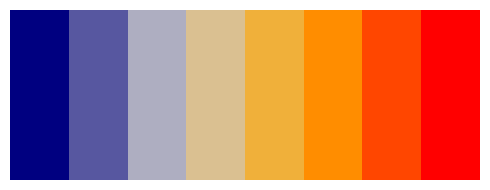

In [11]:
from matplotlib.colors import LinearSegmentedColormap

barcmap = LinearSegmentedColormap.from_list('NavyBlueVeryLightGreyDarkRed', ['#000080', '#CCCCCC', '#FFA500', '#FF0000'], N=8)

NSP.utils.display_cmap(barcmap)

# Voxel masks for all subs

In [3]:
# /home/rfpred/data/natural-scenes-dataset/nsddata/ppdata/subj01/func1mm/roi/prf-visualrois.nii.gz

for subject in NSP.subjects:
    filepath = f"/home/rfpred/data/natural-scenes-dataset/nsddata/ppdata/{subject}/func1mm/roi/prf-visualrois.nii.gz"
    vol_to_surf(subject=subject,
                source_file_name="",
                interpmethod="wta",
                custom_path=filepath
                )

In [5]:
subject = "subj01"

rois, roi_masks, viscortex_mask = NSP.cortex.visrois_dict(verbose=False)
prf_dict = NSP.cortex.prf_dict(rois, roi_masks)

max_size = 2
min_size = .15
patchbound = 1
min_nsd_R2 = 0
min_prf_R2 = 0

voxeldict = {}
n_voxels = []
for roi in rois:
    print_attr = True if roi == rois[len(rois)-1] else False
    voxeldict[roi] = VoxelSieve(NSP, prf_dict, roi_masks,
                                subject=subject, 
                                roi=roi,
                                patchloc='central', 
                                max_size=max_size, 
                                min_size=min_size, 
                                patchbound=patchbound, 
                                min_nsd_R2=min_nsd_R2, 
                                min_prf_R2=min_prf_R2,
                                print_attributes=print_attr,
                                fixed_n_voxels=None)
    n_voxels.append(len(voxeldict[roi].size))
    
# max_n_voxels = np.min(n_voxels)




V1 voxels that fulfill requirements: 437 out of 7887.
V2 voxels that fulfill requirements: 805 out of 8296.
V3 voxels that fulfill requirements: 746 out of 7022.
V4 voxels that fulfill requirements: 538 out of 3976.

Class contains the following attributes:
 .angle
 .ecc
 .figdims
 .nsd_R2
 .patchbound
 .patchcoords
 .patchmask
 .prf_R2
 .sigmas
 .size
 .vox_lim
 .vox_pick
 .xcoor
 .xyz
 .ycoor




In [21]:
import numpy as np

        
        

(437, 3)
(1242, 3)
(1988, 3)
(2526, 3)


In [39]:

max_size = 2
min_size = .15
patchbound = 1
min_nsd_R2 = 0
min_prf_R2 = 0



for subject in NSP.subjects:
    voxeldict = {}
    n_voxels = []
    for roi in rois:
        print_attr = True if roi == rois[len(rois)-1] else False
        voxeldict[roi] = VoxelSieve(NSP, prf_dict, roi_masks,
                                    subject=subject, 
                                    roi=roi,
                                    patchloc='central', 
                                    max_size=max_size, 
                                    min_size=min_size, 
                                    patchbound=patchbound, 
                                    min_nsd_R2=min_nsd_R2, 
                                    min_prf_R2=min_prf_R2,
                                    print_attributes=print_attr,
                                    fixed_n_voxels=None)
        n_voxels.append(len(voxeldict[roi].size))
        
        
    
    
    for i in range(1, 5):
        
        if i == 1:
            voxxyz = voxeldict[f"V{i}"].xyz
        else:
            voxxyz = np.concatenate((voxxyz, voxeldict[f"V{i}"].xyz), axis=0)
            
        print(voxxyz.shape)
            
    
    _ = NSP.utils.coords2nifti(subject=subject,
                        prf_dict=prf_dict,
                        coords=voxxyz,
                        keep_vals=False,
                        save_nifti=True,
                        file_name="voxelselection")

    vol_to_surf(subject=subject,
            source_file_name="voxelselection",
            interpmethod="wta",
            )


V1 voxels that fulfill requirements: 437 out of 7887.
V2 voxels that fulfill requirements: 805 out of 8296.
V3 voxels that fulfill requirements: 746 out of 7022.
V4 voxels that fulfill requirements: 538 out of 3976.

Class contains the following attributes:
 .angle
 .ecc
 .figdims
 .nsd_R2
 .patchbound
 .patchcoords
 .patchmask
 .prf_R2
 .sigmas
 .size
 .vox_lim
 .vox_pick
 .xcoor
 .xyz
 .ycoor


(437, 3)
(1242, 3)
(1988, 3)
(2526, 3)
V1 voxels that fulfill requirements: 176 out of 6476.
V2 voxels that fulfill requirements: 400 out of 6376.
V3 voxels that fulfill requirements: 693 out of 6236.
V4 voxels that fulfill requirements: 299 out of 2887.

Class contains the following attributes:
 .angle
 .ecc
 .figdims
 .nsd_R2
 .patchbound
 .patchcoords
 .patchmask
 .prf_R2
 .sigmas
 .size
 .vox_lim
 .vox_pick
 .xcoor
 .xyz
 .ycoor


(176, 3)
(576, 3)
(1269, 3)
(1568, 3)
V1 voxels that fulfill requirements: 198 out of 7358.
V2 voxels that fulfill requirements: 552 out of 6721.
V3 voxels that 

In [37]:
# for subject in NSP.subjects:

filepath = f"/home/rfpred/data/custom_files/{subject}/stat_volumes/"#voxelselection.nii"
vol_to_surf(subject=subject,
            source_file_name="voxelselection",
            interpmethod="wta",
            # custom_path=filepath
            )